In [1]:
import sys

import numpy as np

from stixdcpy.quicklook import LightCurves
from stixdcpy.energylut import EnergyLUT
from stixdcpy import ancillary as anc
from stixdcpy.net import FitsProduct

from stixdcpy.science import L1Product, SpectrogramProduct
from stixdcpy.housekeeping import Housekeeping


from matplotlib import pyplot as plt

from pprint import pprint
%matplotlib notebook

# Quick-look data 

<IPython.core.display.Javascript object>


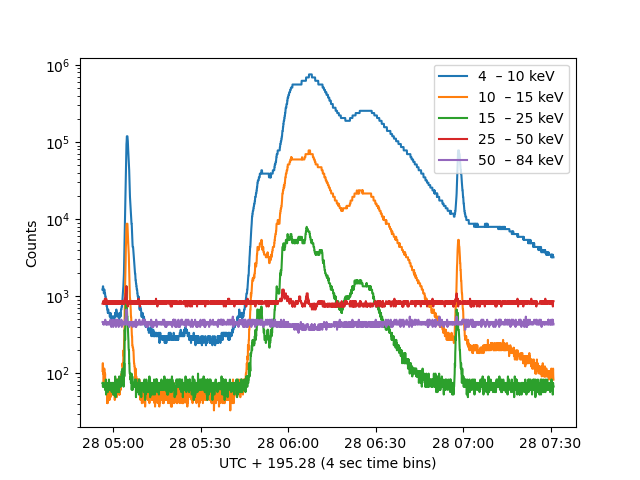

In [2]:
#start_utc=
lc=LightCurves.fetch('2021-08-28T05:00:00', '2021-08-28T07:00:00', ltc=True)
lc.peek()


# Housekeep data

In [3]:
hk_data=Housekeeping.fetch('2021-02-14T05:00:00', '2021-02-15T05:00:00')

<IPython.core.display.Javascript object>


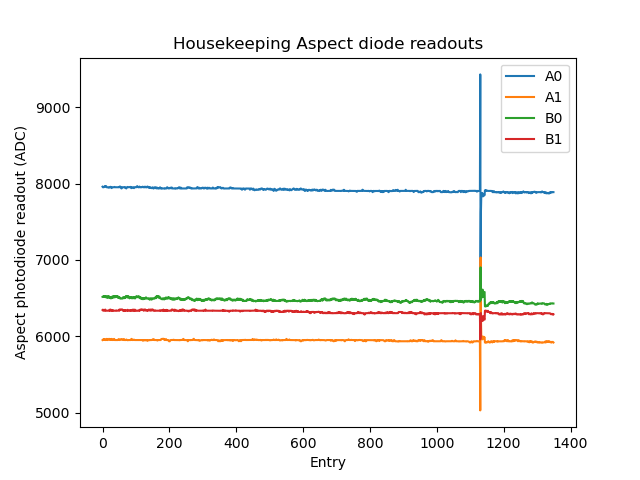

Text(0.5, 1.0, 'Housekeeping Aspect diode readouts')

In [4]:
fig=plt.figure()
plt.plot(hk_data.data[1].data['HK_ASP_PHOTOA0_V'],label='A0')
plt.plot(hk_data.data[1].data['HK_ASP_PHOTOA1_V'],label='A1')
plt.plot(hk_data.data[1].data['HK_ASP_PHOTOB0_V'],label='B0')
plt.plot(hk_data.data[1].data['HK_ASP_PHOTOB1_V'],label='B1')
plt.xlabel('Entry')
plt.legend()
plt.ylabel('Aspect photodiode readout (ADC)')
plt.title('Housekeeping Aspect diode readouts')

# Calibration data

In [5]:
elut=EnergyLUT.request('2021-09-03T00:00:00')

In [6]:
#Print onboard elut and calibration run information
elut.info()
#elut.data


{'calibration_run': {'duration': 86400,
                     'obs_begin': '2021-09-02T12:56:17.958',
                     'run_id': 1353},
 'onboard_elut': {'upload_time_range': ['2021-06-25T14:54:14.456',
                                        '2021-06-25T14:55:49.456']}}


In [7]:
elut.get_pixel_true_ebins(pixel=34)
#print the energy range of bins of pixel 4

array([[-8.00000e-02,  3.93400e+00],
       [ 3.93400e+00,  4.93800e+00],
       [ 4.93800e+00,  5.94200e+00],
       [ 5.94200e+00,  6.94600e+00],
       [ 6.94600e+00,  7.94900e+00],
       [ 7.94900e+00,  8.95300e+00],
       [ 8.95300e+00,  9.95700e+00],
       [ 9.95700e+00,  1.09600e+01],
       [ 1.09600e+01,  1.19640e+01],
       [ 1.19640e+01,  1.29680e+01],
       [ 1.29680e+01,  1.39720e+01],
       [ 1.39720e+01,  1.49750e+01],
       [ 1.49750e+01,  1.59790e+01],
       [ 1.59790e+01,  1.79860e+01],
       [ 1.79860e+01,  1.99940e+01],
       [ 1.99940e+01,  2.20010e+01],
       [ 2.20010e+01,  2.50120e+01],
       [ 2.50120e+01,  2.80230e+01],
       [ 2.80230e+01,  3.20380e+01],
       [ 3.20380e+01,  3.60530e+01],
       [ 3.60530e+01,  4.00680e+01],
       [ 4.00680e+01,  4.50860e+01],
       [ 4.50860e+01,  5.01050e+01],
       [ 5.01050e+01,  5.61270e+01],
       [ 5.61270e+01,  6.31530e+01],
       [ 6.31530e+01,  7.01790e+01],
       [ 7.01790e+01,  7.62010e+01],
 

# S/C Emphemeris 

<IPython.core.display.Javascript object>


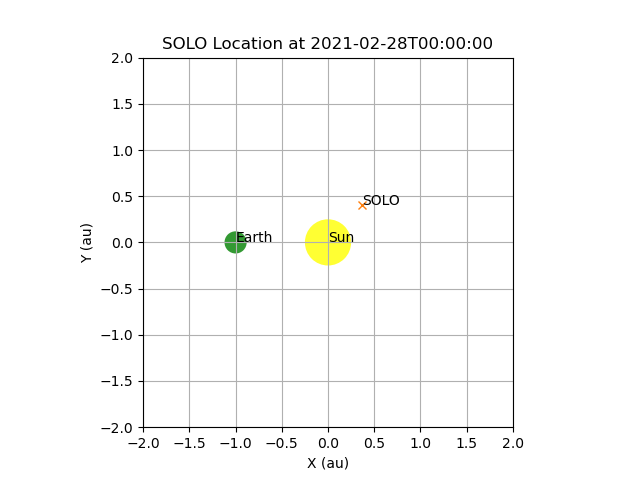

In [12]:
emph=anc.Ephemeris.fetch(start_utc='2021-02-28T00:00:00', end_utc='2021-2-28T01:00:00',steps=2)
emph.peek()

In [13]:
emph.data

{'ref_frame': 'SOLO_HEE_NASA',
 'observer': 'Earth',
 'aunit': 'deg',
 'lunit': 'au',
 'vunit': 'km/s',
 'tunit': 's',
 'utc': ['2021-02-28T00:00:00Z', '2021-02-28T01:00:00Z'],
 'x': [0.37063075930932643, 0.3703068724285023],
 'y': [0.4016105860817567, 0.4022227576272143],
 'z': [0.033407808925602134, 0.033331648992665656],
 'sun_solo_r': [0.5475164876936124, 0.5477420244472667],
 'earth_solo_r': [1.4195454501299072, 1.4194160781560161],
 'speed': [28.962680123927864, 28.943950072734594],
 'owlt': [708.3599704876736, 708.2954132538079],
 'light_time_diff': [221.05551043538696, 220.94797606822772],
 'earth_sun_solo_angle': [132.60426589522183, 132.5365761773595],
 'sun_angular_diameter': [58.39730757989906, 58.3732632204034],
 'elevation': [-3.491687121552749, -3.482315805827291]}

In [14]:
#emph.data

# Science data

##  L1 data products

In [15]:
sci_data=L1Product.fetch(request_id=2105040024)
#Bulk science data request ids (or also called unique ids) can be found on the science data web page at STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2105040024_20210504T045930-20210504T051519_010261_V01.fits ...


In [16]:
data=sci_data.data
#data is a fits file object
data.info()
data[0].header['DATE_BEG']


Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-xray-l1-2105040024_20210504T045930-20210504T051519_010261_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     28   1R x 8C   [J, J, J, 3B, 3B, D, K, 32B]   
  2  DATA          1 BinTableHDU     42   48R x 12C   ['D', 'D', 'B', '144B', '32B', 'B', 'B', '16K', '16D', '12288D', '12288D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


'2021-05-04T04:59:30.980'

<IPython.core.display.Javascript object>


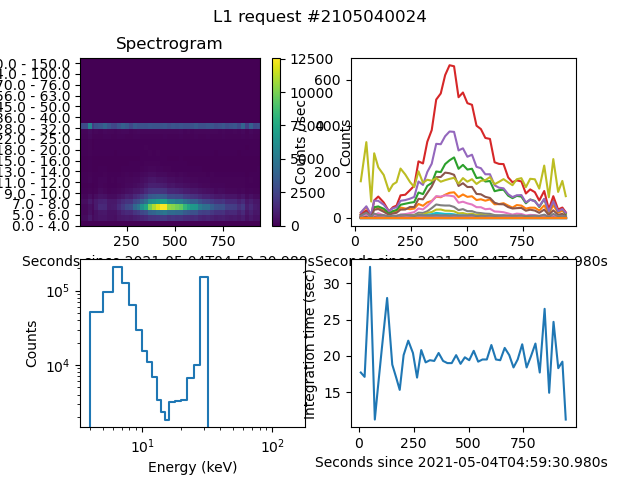

(<Figure size 640x480 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a48057370>,
       dtype=object))

In [17]:
sci_data.peek()
#science data quicklook

## Spectrogram products

In [18]:
request_id=	2108150003
l4d=SpectrogramProduct.fetch(request_id=request_id)
#fetch data from STIX data center

Found the data in local storage. Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_012729_V01.fits ...


Filename: /home/xiaohl/FHNW/STIX/gsw/sdcpy/examples/downloads/solo_L1A_stix-sci-spectrogram-2108150003_20210815T073948-20210815T083441_012729_V01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  CONTROL       1 BinTableHDU     41   1R x 12C   [J, J, J, 3B, 3B, D, J, 12B, 32B, I, K, 32B]   
  2  DATA          1 BinTableHDU     31   166R x 7C   ['D', 'D', 'K', 'D', '32D', '32D', 'K']   
  3  ENERGIES      1 BinTableHDU     19   32R x 3C   ['K', 'D', 'D']   


<IPython.core.display.Javascript object>


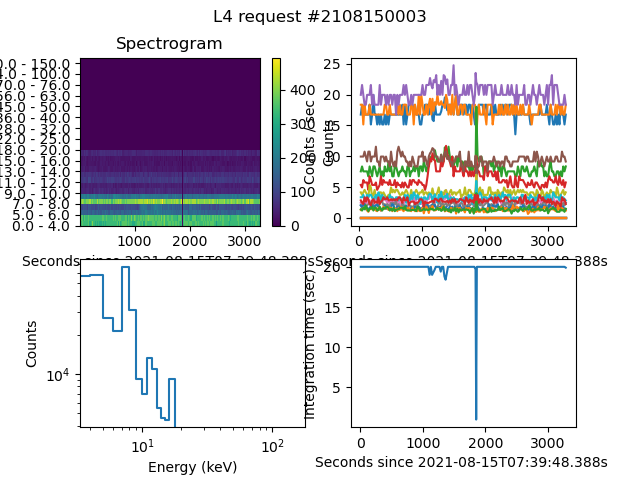

(<Figure size 640x480 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a434a06a0>,
       dtype=object))

In [19]:
l4d.data.info()
l4d.peek()

# Query L1A FITS data products 

In [4]:
res=FitsProduct.query(start_utc='2021-07-28T05:00:00', stop_utc='2021-07-29T07:00:00',product_type='lc')
#print(res)

In [7]:
res.pprint()

[{'url': 'http://pub023.cs.technik.fhnw.ch/download/fits/filename/solo_L1A_stix-ql-lightcurve_20210728_011770_V01.fits', 'observation_time_range': ['2021-07-28T00:00:00.299', '2021-07-28T17:49:08.405'], 'creation_time': '2021-09-07T15:05:14.129', 'fits_id': 11770}, {'url': 'http://pub023.cs.technik.fhnw.ch/download/fits/filename/solo_L1A_stix-ql-lightcurve_20210729_011781_V01.fits', 'observation_time_range': ['2021-07-29T00:00:00.443', '2021-07-29T11:13:08.510'], 'creation_time': '2021-09-07T15:05:19.471', 'fits_id': 11781}, {'url': 'http://pub023.cs.technik.fhnw.ch/download/fits/filename/solo_L1A_stix-ql-lightcurve_20210728_011782_V01.fits', 'observation_time_range': ['2021-07-28T17:49:08.408', '2021-07-29T00:00:00.443'], 'creation_time': '2021-09-07T15:05:19.472', 'fits_id': 11782}]

In [ ]:
fits_list=res.fetch()